![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [ ]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


In [210]:
crimes.isnull().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
STD TIME             0
HR                   0
Cr period         8728
dtype: int64

In [193]:
crimes['STD TIME']=pd.to_datetime(crimes['TIME OCC'], format='%H%M').dt.strftime('%I:%M %p')

**Q.Which hour has the highest frequency of crimes? Store as an integer variable called ``peak_crime_hour``.**

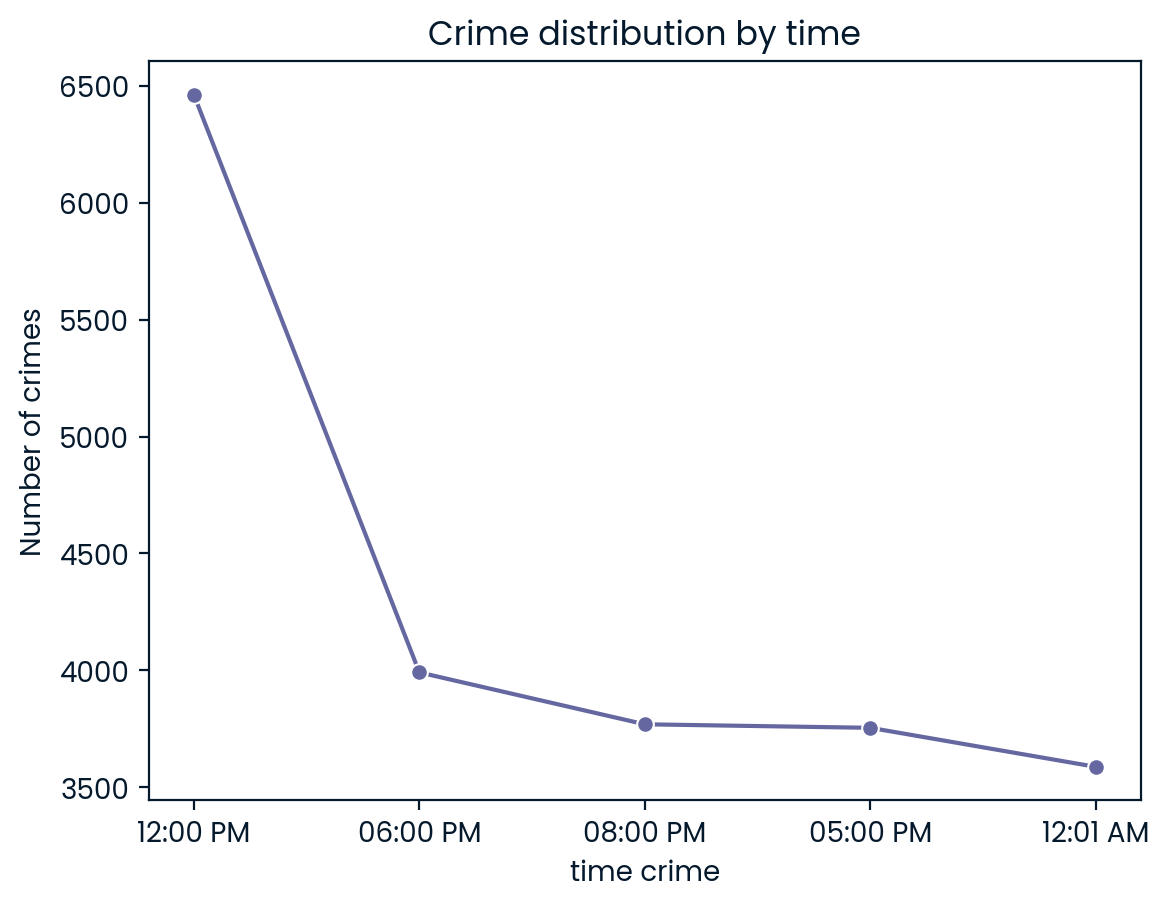

In [194]:
sns.lineplot(crimes.groupby("STD TIME")["DR_NO"].count().sort_values(ascending=False).head(5),marker='o')
plt.title("Crime distribution by time")
plt.xlabel("time crime")
plt.ylabel("Number of crimes")
plt.show()

In [195]:
peak_crime_hour=12

- we can see that most of crimes are committed at 12:00 pm this cloud be because of 12:00 noon is peaklunch time, meaning many people are out in public areas, increasing the chances of crime.
- More thefts and fraud-related crimes during occurs at lunch breaks when people are distracted.
- we can see a huge decline in crimes between 05:00 PM to 08:00 PM  as compared to 12:00 PM, this colud be because of increased police and security presence in public places and rush hour traffic makes criminal activities harder.


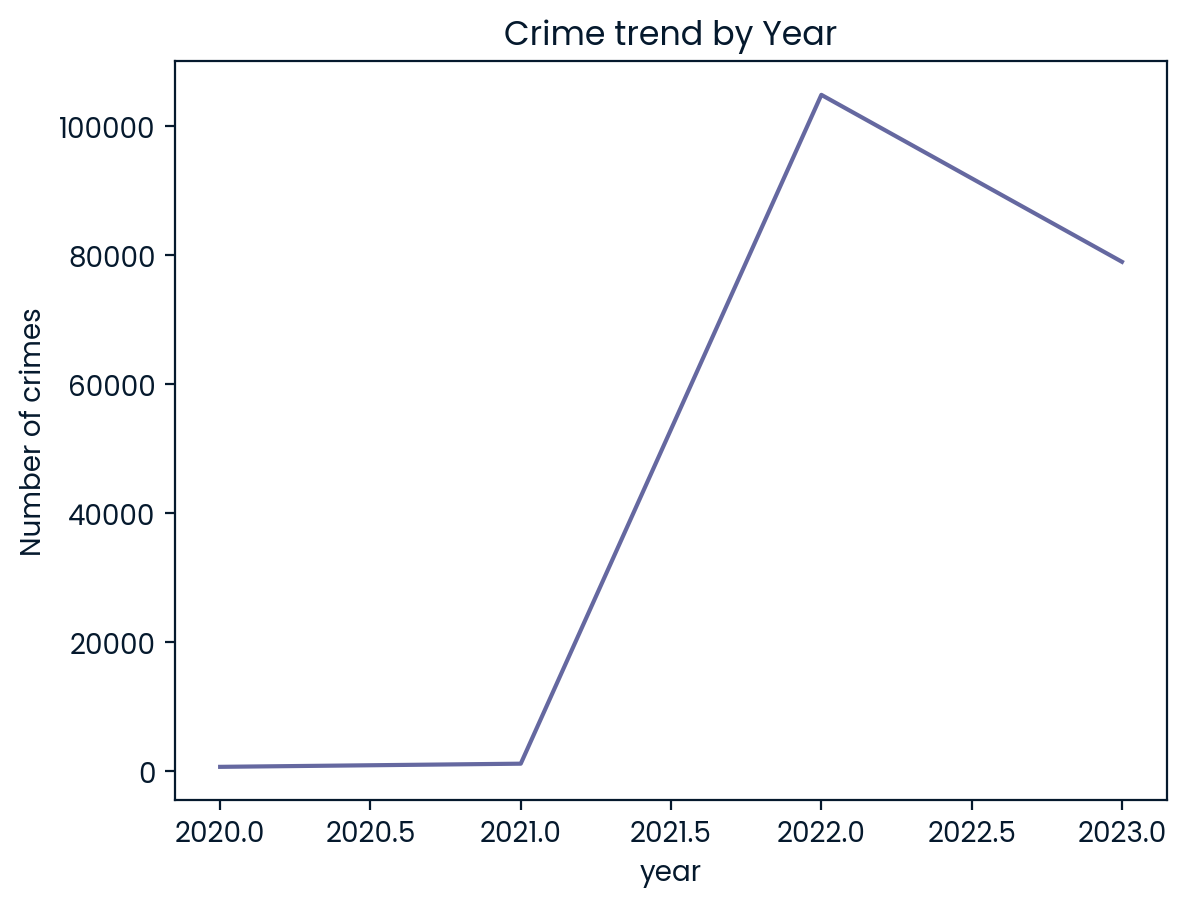

In [223]:
sns.lineplot(crimes['DATE OCC'].dt.year.value_counts())
plt.title('Crime trend by Year')
plt.xlabel('year')
plt.ylabel('Number of crimes')
plt.show()

1. Minimum Crime in 2020 and 2021

    - The number of crimes recorded in 2020 and 2021 is extremely low.
    - This could be due to missing data, or real-world events like the COVID-19 pandemic, which led to lockdowns and reduced public activity.
2. Sharp Surge in 2022

    - Crime numbers sharply increased in 2022, exceeding 100,000 incidents, the highest in the given timeframe.
    - Possible reasons for this spike include:
        - Post-pandemic : More people resuming regular activities led to an increase in crime.
        - Economic factors: Financial stress post-pandemic may have influenced higher crime rates.
        - Better reporting mechanisms: A shift in law enforcement or data collection policies could have contributed.
3. Decline in 2023

    - There is a  drop in crime numbers in 2023, though they remain higher than pre-2022 levels.
    - This decline could be due to stricter law enforcement measures, policy changes.

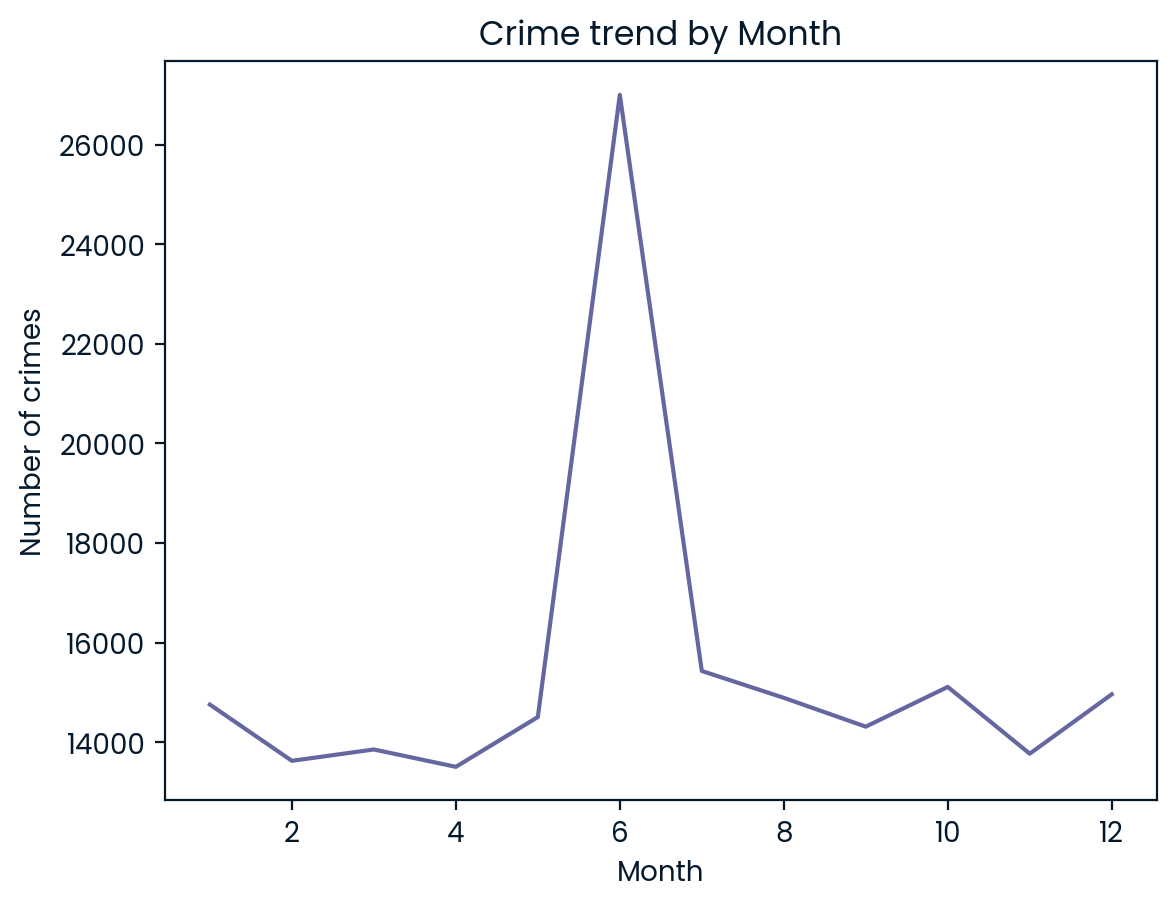

In [220]:
sns.lineplot(crimes['DATE OCC'].dt.month.value_counts())
plt.title('Crime trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of crimes')
plt.show()

1. Crimes are at Peak in June:

    - There is a sharp rise in crime during June, reaching over 27,000 incidents, making it the month with the highest crime rate.
    - This could be due to seasonal factors, increased outdoor activities, or special events leading to more crime.
2. Stable Crime Rate in Other Months:

    - Aside from the spike in June, crime rates lies between 13,000 to 16,000 incidents in most other months.
    - There are minor variations, but no other extreme peaks or dips.
3. Sharp Decline After June:

    - Crimes drop significantly in July, almost back to the average monthly levels.
    - This suggests that the June spike was due to a temporary factor rather than a long-term trend.

**Q.Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called ``peak_night_crime_location``**

In [196]:
crimes["TIME OCC"]=pd.to_datetime(crimes["TIME OCC"],format='%H%M')

In [197]:
#crimes commited between 10PM to 4AM
night_crimes=crimes[(crimes["TIME OCC"].dt.hour>=22) | (crimes["TIME OCC"].dt.hour<4)]

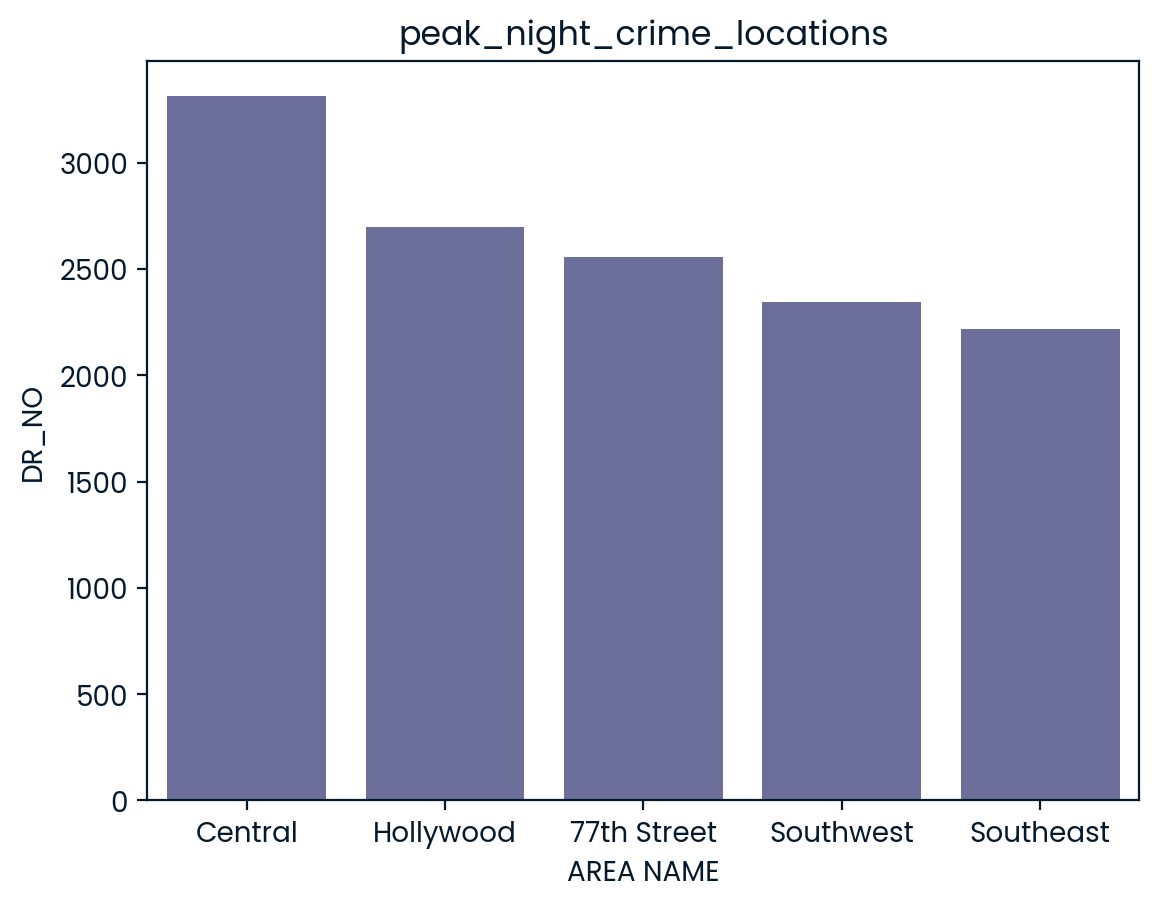

In [198]:
sns.barplot(night_crimes.groupby('AREA NAME')["DR_NO"].count().sort_values(ascending=False).head(5))
plt.title("peak_night_crime_locations")
plt.show()

In [199]:
peak_night_crime_location=night_crimes.groupby('AREA NAME')["DR_NO"].count().sort_values(ascending=False).head(1).index[0]

- Central LA has the highest number of night-time crimes, with over 3,000 reported cases, making it the most crime-prone area during these hours, this could be because of high populatoin density and nightlife activity in this area.
- Hollywood follows closely, with a slightly lower crime count, indicating significant criminal activity at night in this area as well.
- 77th Street, Southwest, and Southeast divisions also report high crime rates, but they are comparatively lower than Central and Hollywood.
- The declining trend from Central to Southeast suggests that crime incidents gradually decrease in certain neighborhoods, but the numbers remain significant.

**Q.Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called ``victim_ages``, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.**

In [200]:
bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
victim_ages=pd.Series(pd.cut(crimes['Vict Age'], bins=bins, labels=labels, right=True).value_counts(),index=labels)

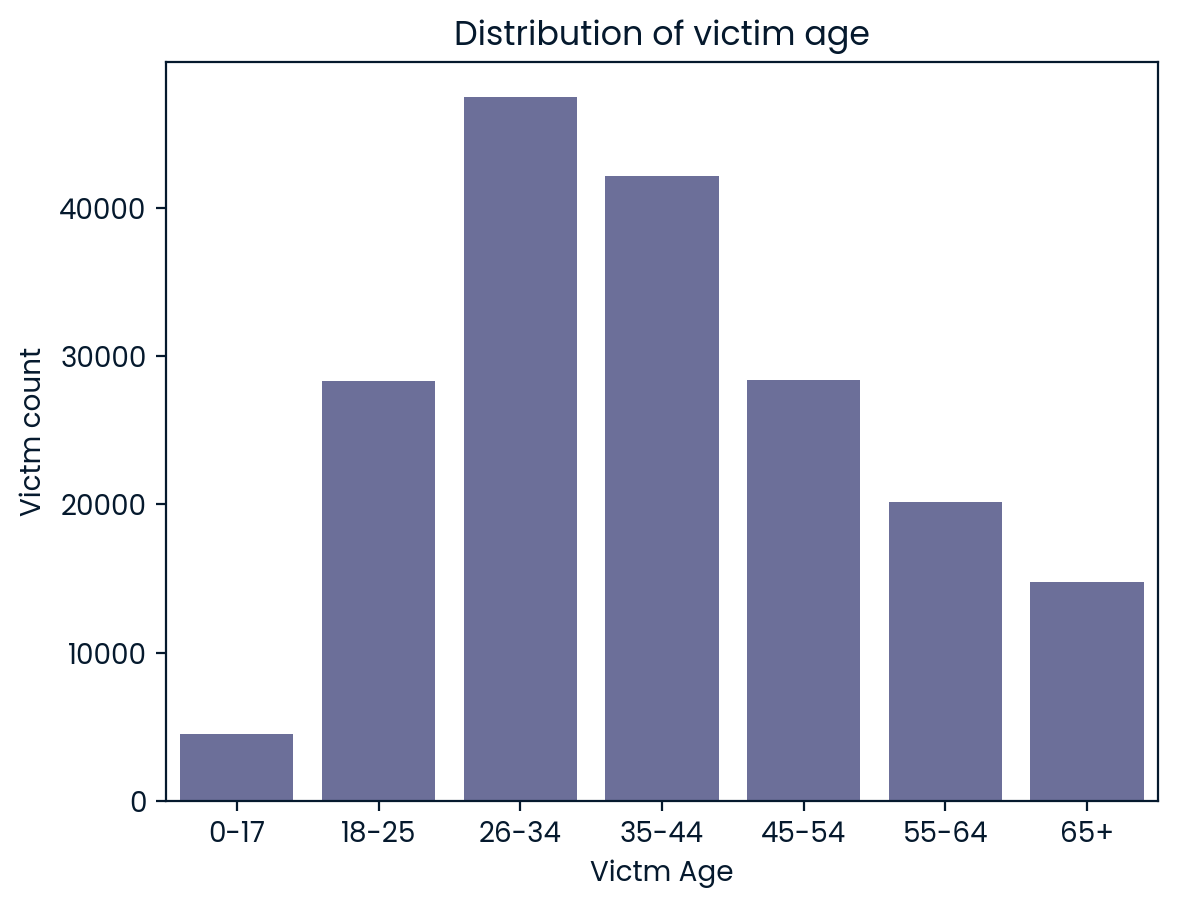

In [201]:
sns.barplot(victim_ages)
plt.title("Distribution of victim age")
plt.xlabel("Victm Age")
plt.ylabel("Victm count")
plt.show()

1. The highest number of victims falls within the 26-34 age group.

    - This group shows the peak in victimization, possibly due to higher engagement in social activities, workplaces, and urban environments where crimes are more likely to occur.
2. The 35-44 age group follows closely behind, with a slightly lower but still significant victim count.

    - This age range might be vulnerable to workplace-related crimes, financial fraud, or violent crimes.
3.Young adults (18-25) also have a high victimization rate.

    - This group may be more exposed to crimes such as robbery, assault, and street crimes, possibly due to nightlife activity and public interactions.
4. Victimization decreases significantly for older age groups (55-64, 65+).

    - Elderly individuals may be less exposed to violent crimes but could be victims of fraud, scams, or abuse.
5. Minors (0-17) have the lowest victim count.

    - While lower, crimes against minors might include domestic abuse, kidnapping, or exploitation, which are often underreported.

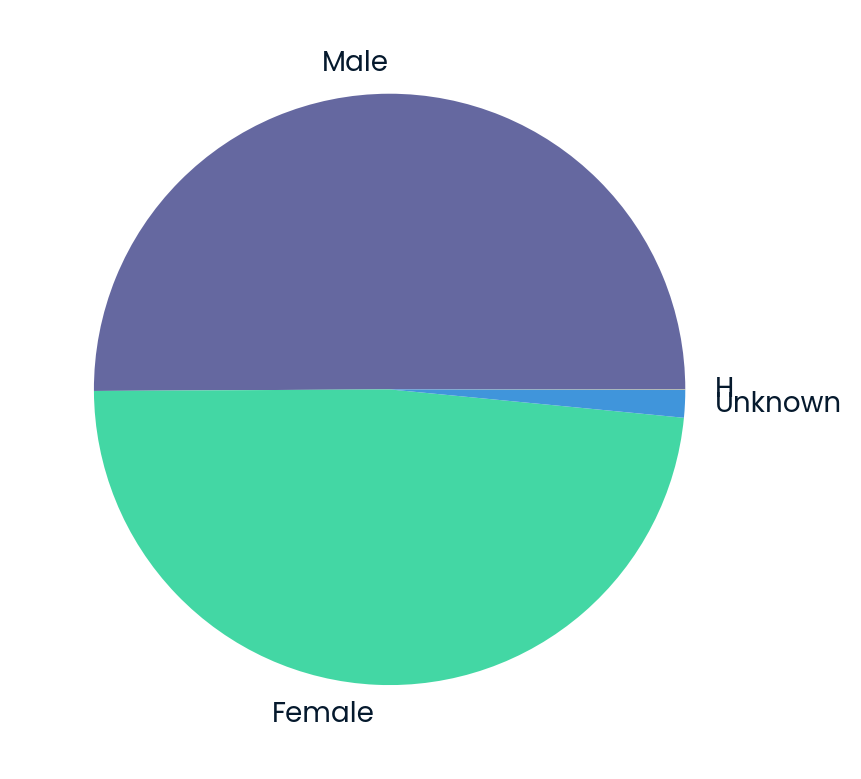

In [202]:
crimes_by_sex=crimes['Vict Sex'].value_counts()
plt.pie(crimes_by_sex,labels=['Male','Female','Unknown','H'])
plt.show("Distribution of Crime by sex")

1. Males appear to have a slightly larger share, which may indicate higher victimization in violent crimes such as assaults and robberies.
2. Female victims likely correspond to crimes such as domestic violence, sexual assault, or harassment.


In [203]:
#craeting a new column that contains hour of the crime commited 
crimes['HR']=crimes["TIME OCC"].dt.hour

In [204]:
# creating a new column that will store crimes commited between a time period
bins = [0, 6, 12, 18, 24]
labels = ["12 AM - 6 AM (Night)", 
          "6 AM - 12 PM (Morning)", 
          "12 PM - 6 PM (Afternoon)", 
          "6 PM - 12 AM (Evening)"]  
crimes['Cr period']=pd.cut(crimes['HR'], bins=bins,labels=labels,right=True)

In [205]:
#calculating the number of crimes commtied between a time period at a loctaion
crimes_by_area_and_time=crimes.groupby(['AREA NAME','Cr period'])['DR_NO'].count().reset_index()

In [206]:
#creating a pivot
crimes_by_area_and_time=crimes_by_area_and_time.pivot(index='AREA NAME',columns='Cr period',values='DR_NO')

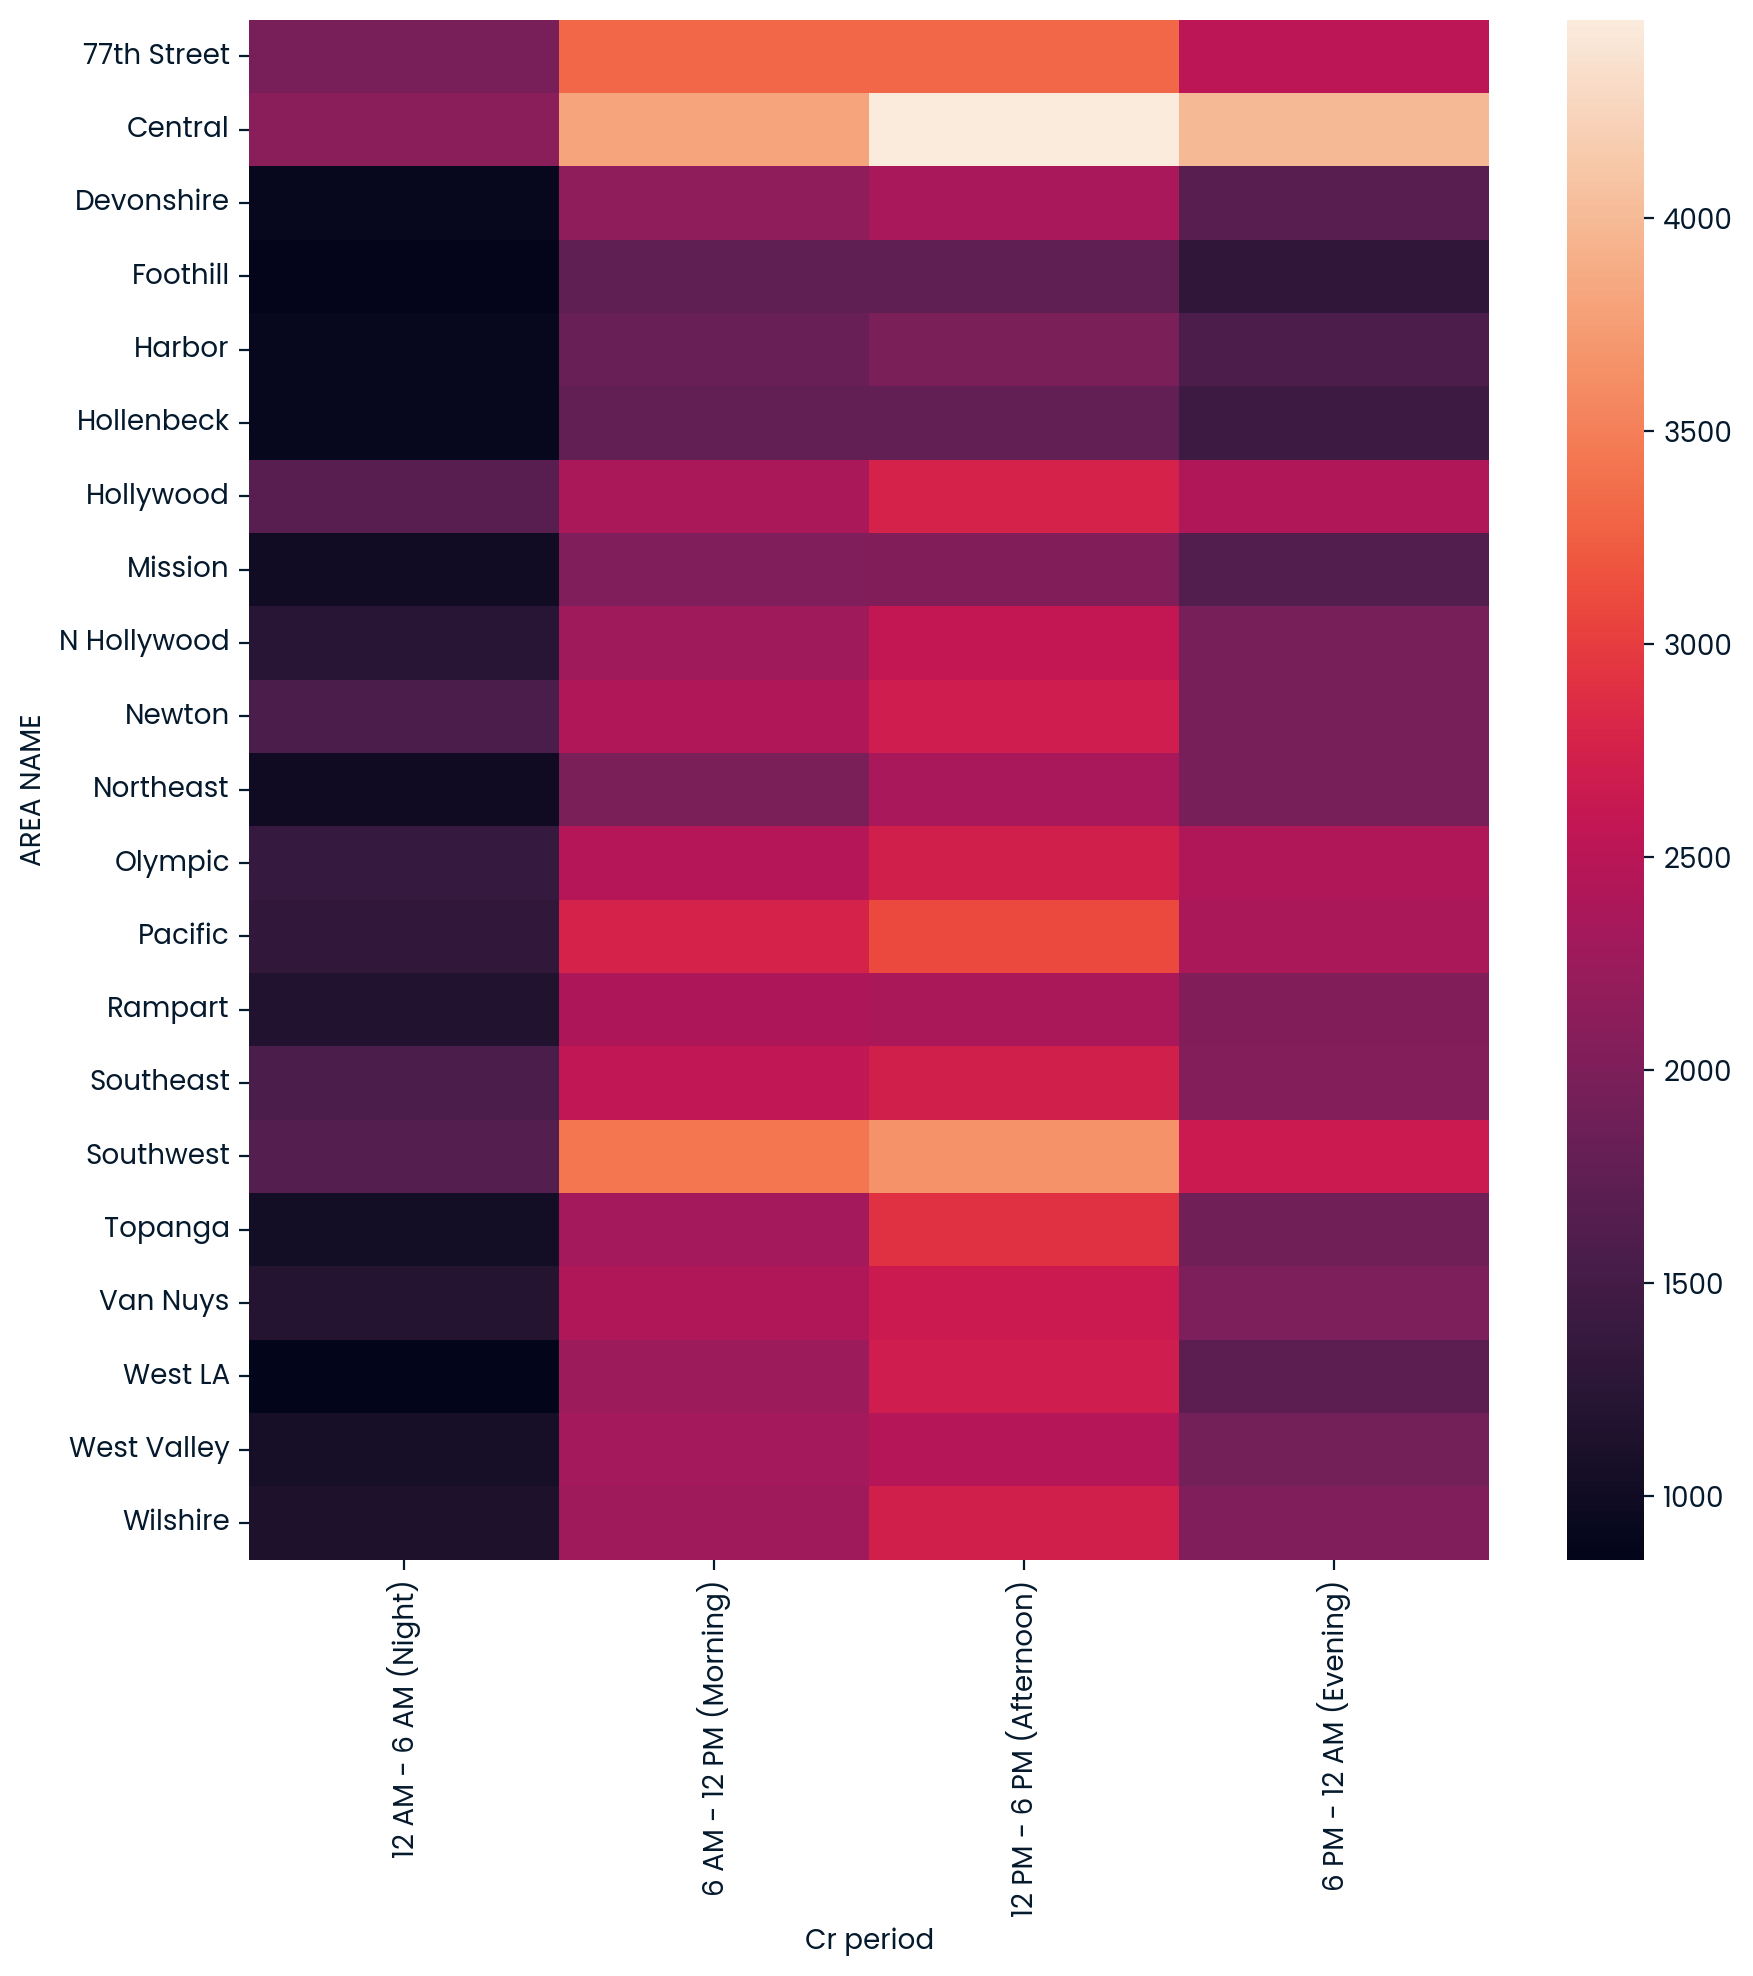

In [207]:
plt.figure(figsize=(10,10))
sns.heatmap(crimes_by_area_and_time)
plt.show()

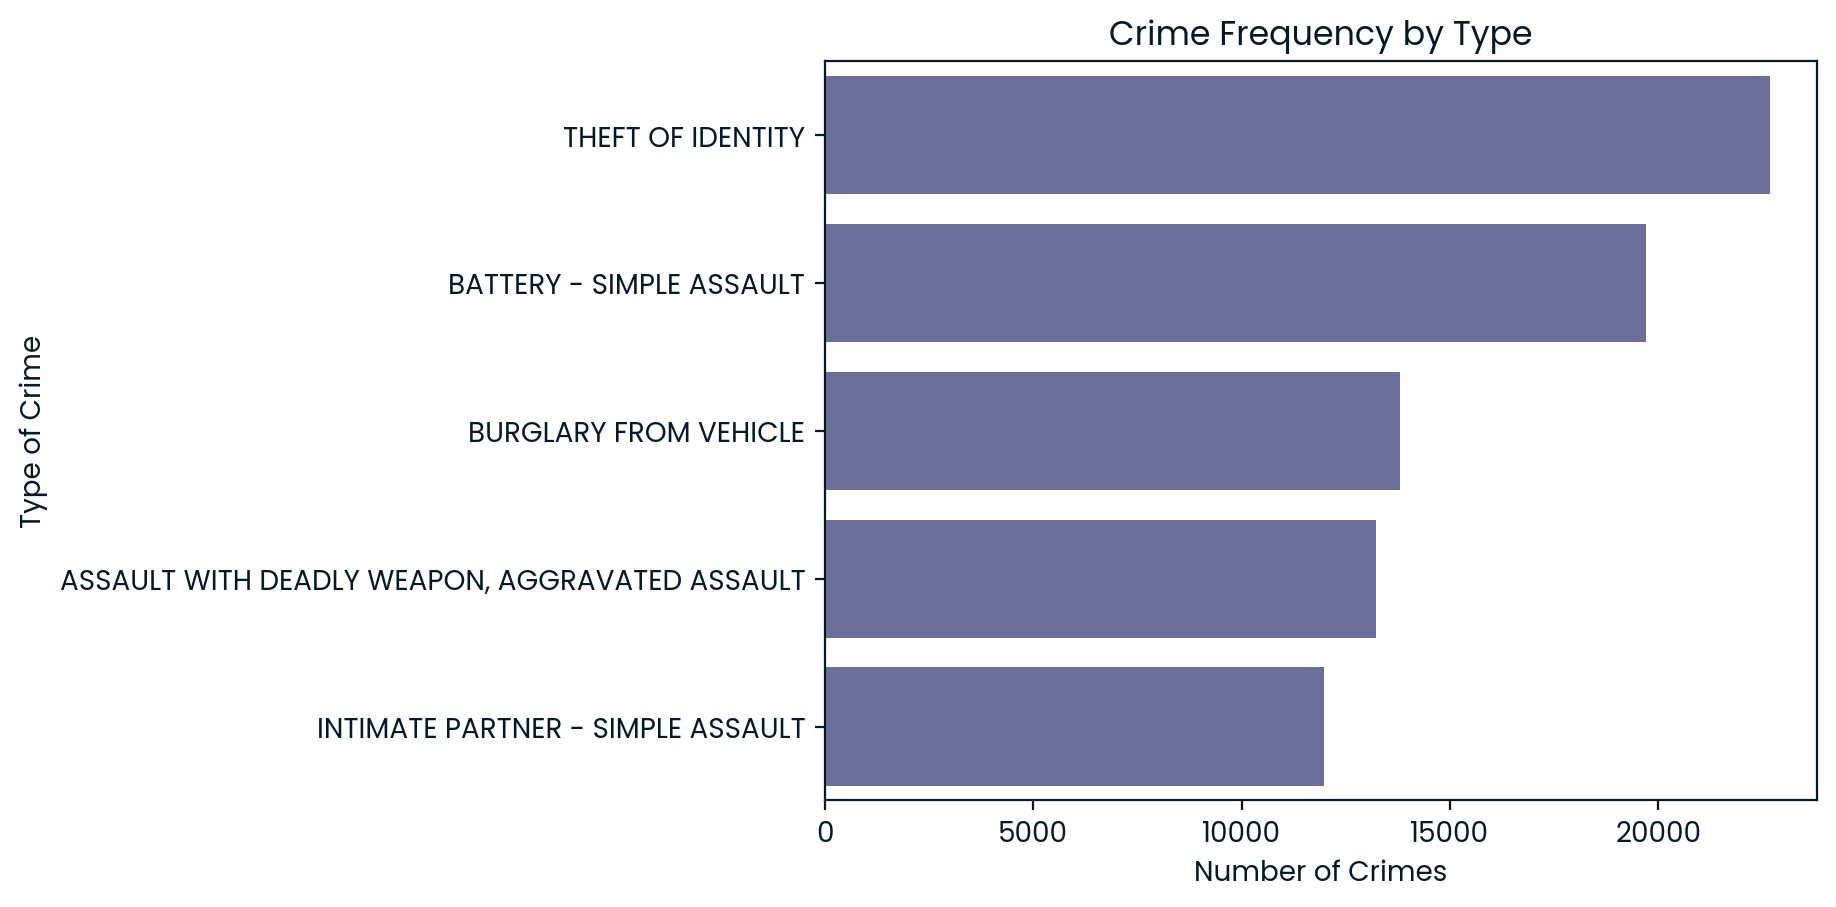

In [8]:
# plt.figure(figsize=(10, 6)
sns.barplot(crimes['Crm Cd Desc'].value_counts().sort_values(ascending=False).head(5),orient='h')
plt.xlabel("Number of Crimes")
plt.ylabel("Type of Crime")
plt.title("Crime Frequency by Type")
plt.show()

- Theft fo identity has the highest number of reported cases 
- Battery - Simple Assault is the second most frequent crime, showing a significant number of physical altercations.
- Burglary from Vehicle is also common, highlighting vehicle-related theft as a persistent issue.
- Assault with a Deadly Weapon (Aggravated Assault) ranks high, suggesting a notable number of violent crimes.
- Intimate Partner - Simple Assault is the least frequent among the top five, but its presence indicates domestic violence concerns.